# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024?resource=download

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../dataset_raw/nearest-earth-objects(1910-2024).csv')
print(f"Dataset dimuat: {df.shape[0]} baris, {df.shape[1]} kolom")
df.head()

Dataset dimuat: 338199 baris, 9 kolom


,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# 1. Cek Missing Values & Info
print("--- Info Dataset ---")
df.info()

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [4]:
print("\n--- Statistik Deskriptif ---")
display(df.describe())


--- Statistik Deskriptif ---


,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


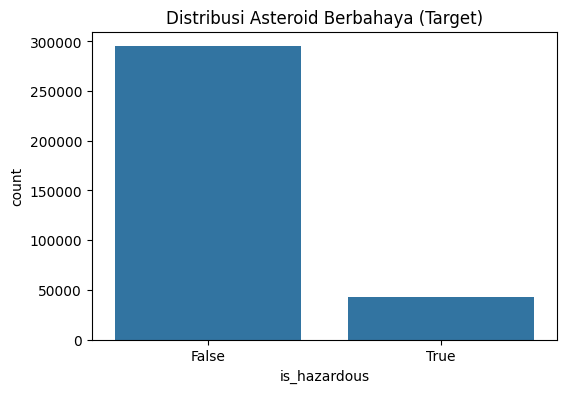

In [5]:
# 2. Distribusi Target (is_hazardous)
plt.figure(figsize=(6, 4))
sns.countplot(x='is_hazardous', data=df)
plt.title('Distribusi Asteroid Berbahaya (Target)')
plt.show()

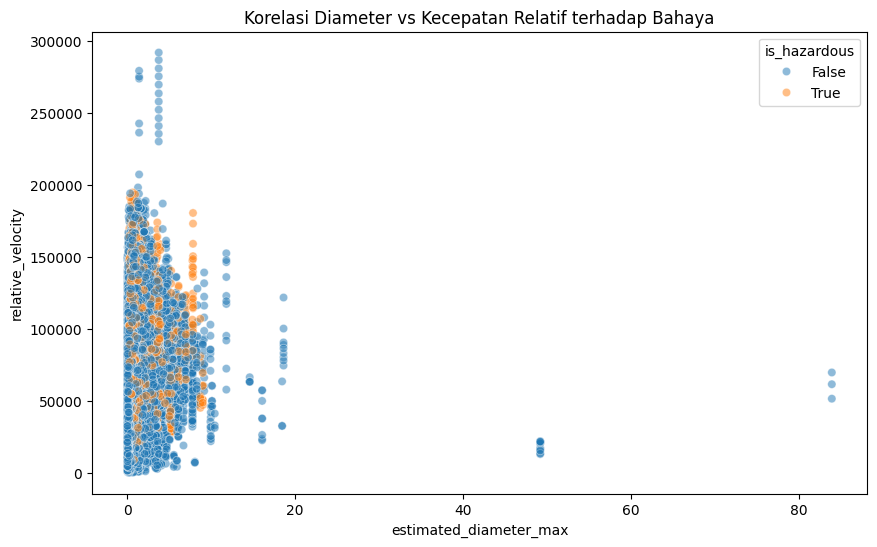

In [6]:
# 3. Hubungan Diameter vs Bahaya
plt.figure(figsize=(10, 6))
sns.scatterplot(x='estimated_diameter_max', y='relative_velocity', hue='is_hazardous', data=df, alpha=0.5)
plt.title('Korelasi Diameter vs Kecepatan Relatif terhadap Bahaya')
plt.show()

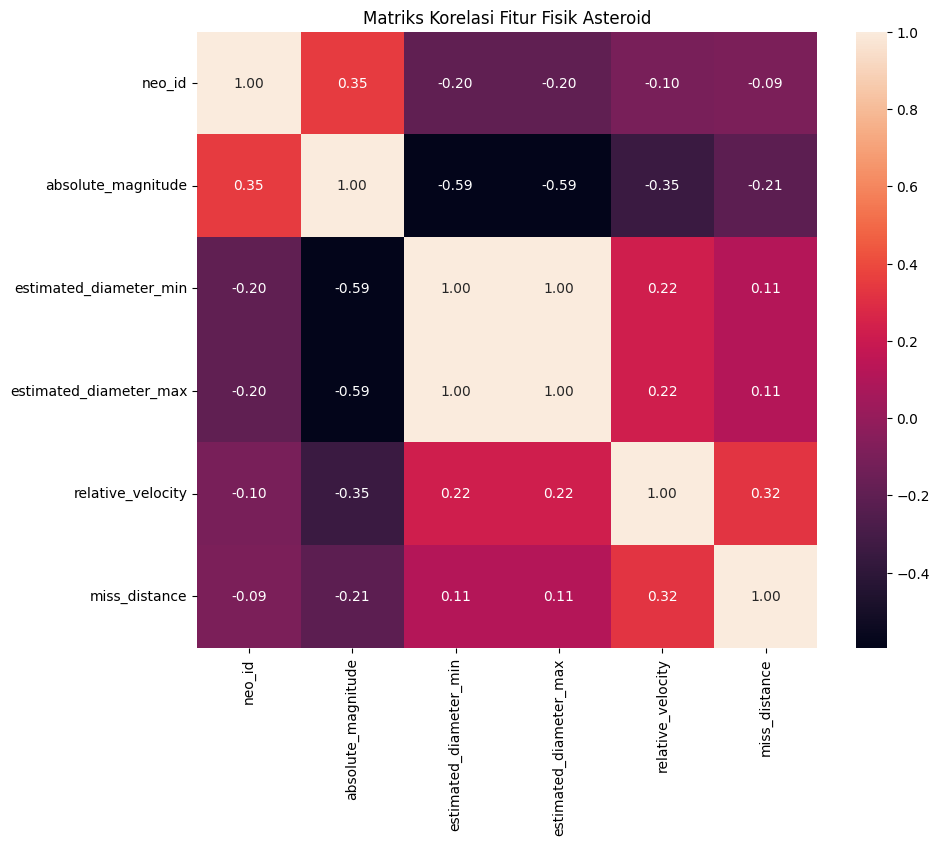

In [7]:
# 4. Heatmap Korelasi Numerik
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='rocket', fmt='.2f')
plt.title('Matriks Korelasi Fitur Fisik Asteroid')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# 1. Drop kolom yang tidak berguna (ID, Nama, dan Orbiting Body yang konstan 'Earth')
df_clean = df.drop(['neo_id', 'name', 'orbiting_body'], axis=1)

In [9]:
# 2. Handling Missing Values (Data NASA ini memiliki beberapa baris kosong)
df_clean = df_clean.dropna()

In [10]:
# 3. Encoding Target (Bool to Int)
df_clean['is_hazardous'] = df_clean['is_hazardous'].astype(int)

In [11]:
# 4. Split Data
X = df_clean.drop('is_hazardous', axis=1)
y = df_clean['is_hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# 5. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# 6. Simpan Hasil
os.makedirs('nearest_earth_object_preprocessing', exist_ok=True)
pd.DataFrame(X_train_scaled, columns=X.columns).to_csv('nearest_earth_object_preprocessing/X_train.csv', index=False)
y_train.to_csv('nearest_earth_object_preprocessing/y_train.csv', index=False)
print("Preprocessing Selesai!")

Preprocessing Selesai!


In [14]:
os.makedirs('nearest_earth_object_preprocessing', exist_ok=True)
pd.DataFrame(X_train_scaled).to_csv('nearest_earth_object_preprocessing/X_train.csv', index=False)
pd.DataFrame(X_test_scaled).to_csv('nearest_earth_object_preprocessing/X_test.csv', index=False)
y_train.to_csv('nearest_earth_object_preprocessing/y_train.csv', index=False)
y_test.to_csv('nearest_earth_object_preprocessing/y_test.csv', index=False)

print("Preprocessing Selesai & Data Tersimpan!")

Preprocessing Selesai & Data Tersimpan!
